In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array,load_img
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt

In [8]:
train_csv=pd.read_csv("Training_set.csv")
test_csv=pd.read_csv("Testing_set.csv")

In [9]:
train_csv

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [10]:
train_csv["label"].unique()

array(['sitting', 'using_laptop', 'hugging', 'sleeping', 'drinking',
       'clapping', 'dancing', 'cycling', 'calling', 'laughing', 'eating',
       'fighting', 'listening_to_music', 'running', 'texting'],
      dtype=object)

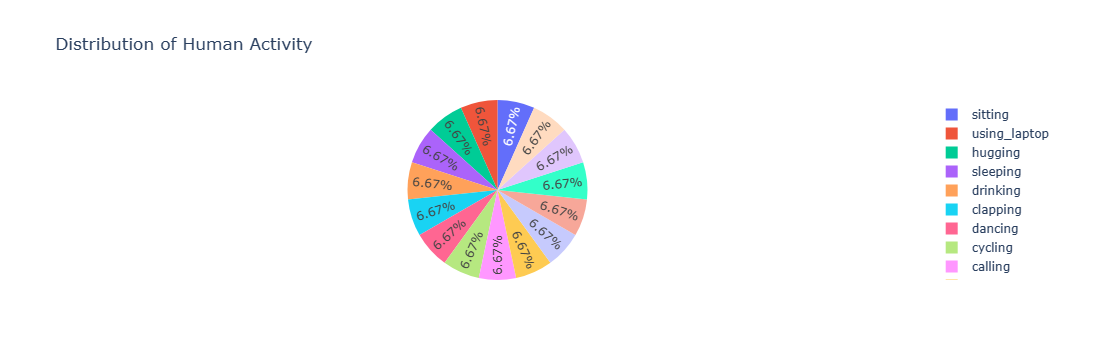

In [11]:
import plotly.express as px
HAR = train_csv.label.value_counts()
fig = px.pie(train_csv, values=HAR.values, names=HAR.index, title='Distribution of Human Activity')
fig.show()

In [12]:
img_data=[]
img_label=[]

for i in range(len(train_csv)):
    img="train/"+train_csv["filename"][i]
    img=load_img(img,target_size=(150,150))
    img=img_to_array(img)
    img_data.append(img)
    img_label.append(train_csv["label"][i])

In [13]:
img_data=np.array(img_data)

In [14]:
img_data.shape

(12600, 150, 150, 3)

In [15]:
img_label=np.array(img_label)

In [16]:
img_label.shape

(12600,)

In [17]:
filename = train_csv['filename']

situation = train_csv['label']

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
img_label=encoder.fit_transform(img_label)

In [19]:
img_label=to_categorical(img_label)

In [20]:
img_label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

C:\Users\Swathi\anaconda3\envs\swkini\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/40
315/315 ━━━━━━━━━━━━━━━━━━━━ 202s 631ms/step - accuracy: 0.0750 - loss: 27.6801 - val_accuracy: 0.0877 - val_loss: 2.6887
Epoch 2/40
315/315 ━━━━━━━━━━━━━━━━━━━━ 204s 638ms/step - accuracy: 0.1056 - loss: 2.6711 - val_accuracy: 0.0877 - val_loss: 2.7034
Epoch 3/40
315/315 ━━━━━━━━━━━━━━━━━━━━ 194s 614ms/step - accuracy: 0.1095 - loss: 2.6687 - val_accuracy: 0.0905 - val_loss: 2.6984
Epoch 4/40
315/315 ━━━━━━━━━━━━━━━━━━━━ 199s 631ms/step - accuracy: 0.1302 - loss: 2.5809 - val_accuracy: 0.0913 - val_loss: 2.8105
Epoch 5/40
315/315 ━━━━━━━━━━━━━━━━━━━━ 199s 632ms/step - accuracy: 0.1738 - loss: 2.4716 - val_accuracy: 0.0925 - val_loss: 2.7759
Epoch 6/40
315/315 ━━━━━━━━━━━━━━━━━━━━ 199s 631ms/step - accuracy: 0.2162 - loss: 2.3487 - val_accuracy: 0.1071 - val_loss: 2.9649
Epoch 7/40
315/315 ━━━━━━━━━━━━━━━━━━━━ 196s 621ms/step - accuracy: 0.2546 - loss: 2.2315 - val_accuracy: 0.1083 - val_loss: 3.2664
Epoch 8/40
315/315 ━━━━━━━━━━━━━━━━━━━━ 194s 616ms/step - accuracy: 0.3026 

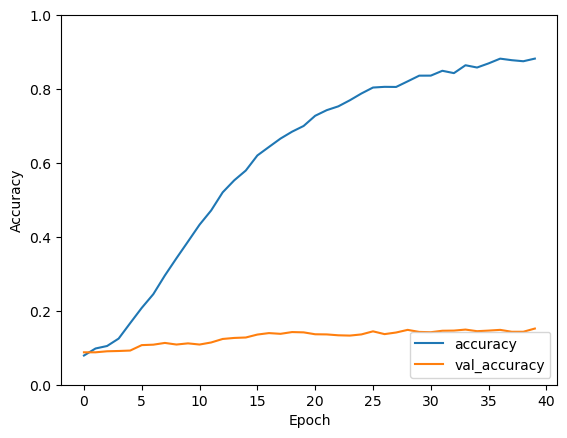

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(img_data, img_label, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout for regularization
    Dense(15, activation='softmax')  # Assuming you have 15 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_val, y_val))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [22]:
model.save('harmodel.h5') 